In [1]:
import tensorflow as tf 
from tensorflow import keras
from keras import models, layers
from tensorflow.keras.utils import plot_model

In [2]:
cifar10 = keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train:", len(x_train), "x_test:", len(x_test))

x_train: 50000 x_test: 10000


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
def AlexNet(n_classes):

  input_shape = (32,32,3)

  input = layers.Input(shape=input_shape)
  
  x = layers.Conv2D(filters=96,kernel_size=11, strides=4)(input)
  x = layers.Activation('relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPool2D(pool_size=(3,3),strides=2,padding='same')(x)

  x = layers.Conv2D(filters=256,kernel_size=5, padding='same')(x)
  x = layers.Activation('relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPool2D(pool_size=(3,3),strides=2)(x)

  x = layers.Conv2D(filters=384,kernel_size=3, padding='same')(x)
  x = layers.Activation('relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Conv2D(filters=384,kernel_size=3, padding='same')(x)
  x = layers.Activation('relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Conv2D(filters=256,kernel_size=3, padding='same')(x)
  x = layers.Activation('relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPool2D(pool_size=(3,3),strides=2,padding='same')(x)

  x = layers.Flatten()(x)
  x = layers.Dense(4096,activation='relu')(x)
  x = layers.Dropout(rate=0.5)(x)
  x = layers.Dense(4096,activation='relu')(x)
  x = layers.Dropout(rate=0.5)(x)
  x = layers.Dense(n_classes)(x)
  x = layers.Activation('softmax', dtype='float32')(x)


  return models.Model(input,x,name='AlexNet')

In [5]:
AlexNet = AlexNet(n_classes=10)
AlexNet.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 96)          34944     
                                                                 
 activation (Activation)     (None, 6, 6, 96)          0         
                                                                 
 batch_normalization (BatchN  (None, 6, 6, 96)         384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 256)         6146

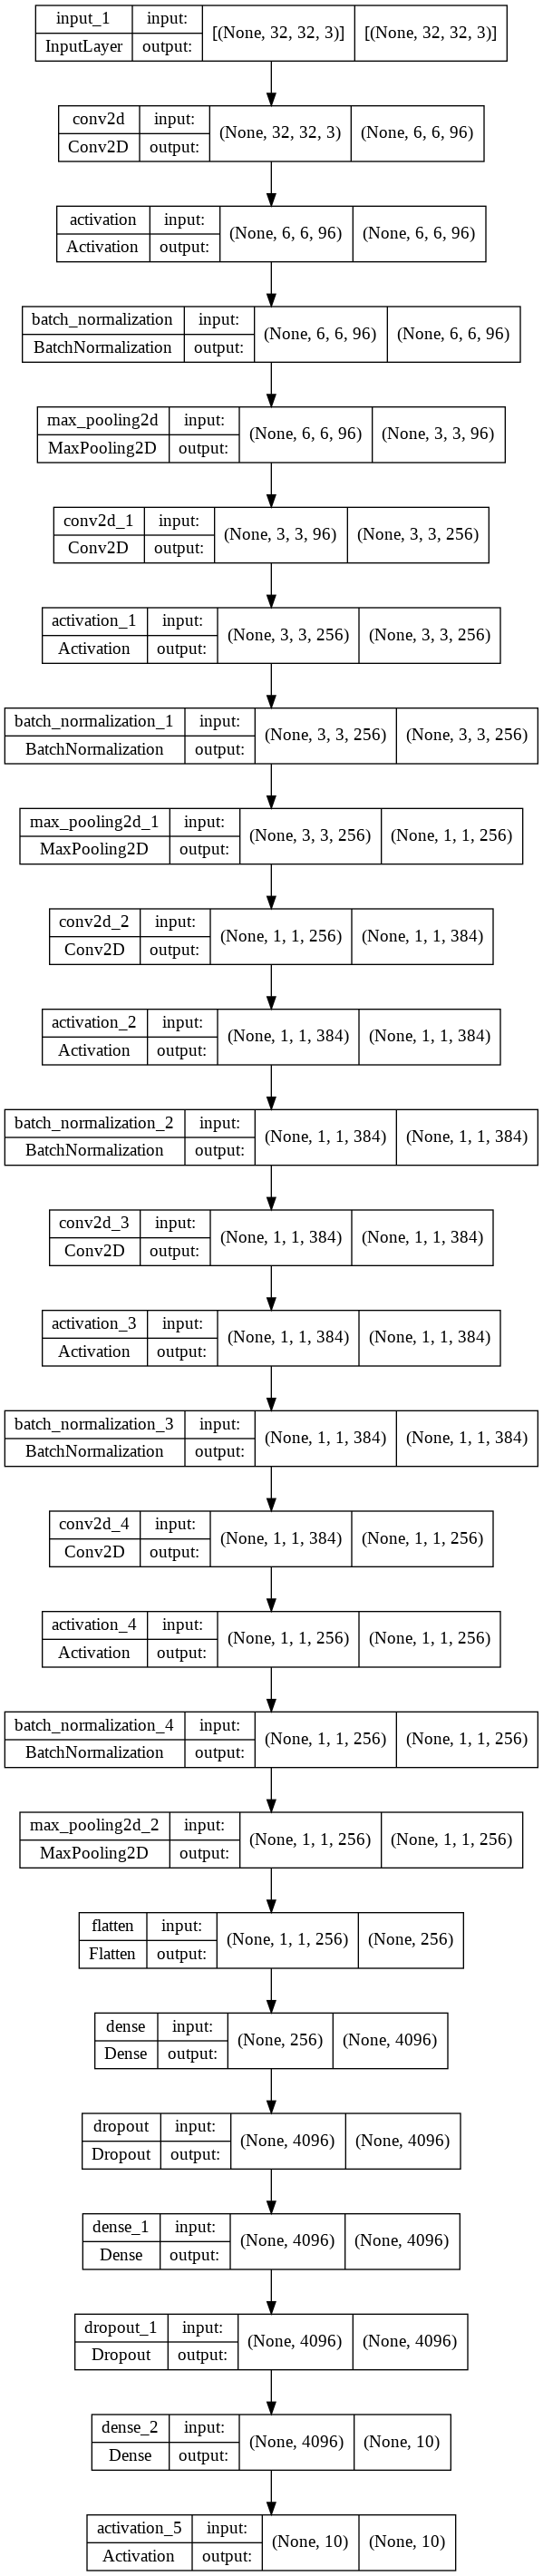

In [6]:
plot_model(AlexNet,show_shapes=True)

In [7]:
AlexNet.compile(optimizer=keras.optimizers.SGD(lr=0.01,momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_AlexNet = AlexNet.fit(x_train, y_train, epochs=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1563/1563 [==============================] - 22s 11ms/step - loss: 1.8053 - accuracy: 0.3463
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5663 - accuracy: 0.4415
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4603 - accuracy: 0.4824
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3654 - accuracy: 0.5202
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2784 - accuracy: 0.5521
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2113 - accuracy: 0.5780
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1495 - accuracy: 0.5974
Epoch 8/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0821 - accuracy: 0.6242
Epoch 9/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0294 - accuracy: 0.6424
Epoch 10/50
1563/1563 [==============================] - 14s 9ms/step 

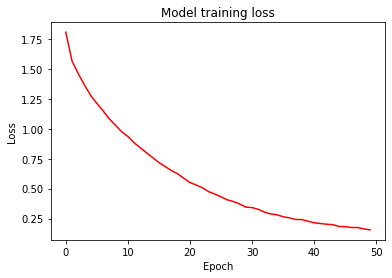

In [8]:
import matplotlib.pyplot as plt

plt.plot(history_AlexNet.history['loss'], 'r')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

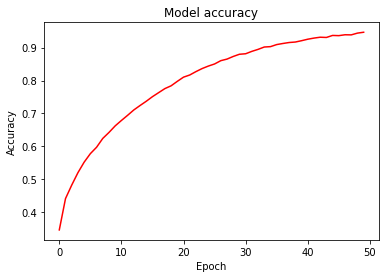

In [9]:
plt.plot(history_AlexNet.history['accuracy'], 'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()